# Sub-Analysis: Variation of Model Constants for a Circumbinary System

## Special Edition: Now With Fewer Graphs!
(I've only included the 2-D plots of the orbits in this file)

<br />

*A 488 Computational Astrophysics Project by Tyler Barna<sup>1</sup>*

<small><sup>1</sup>Department of Physics and Astronomy, Rutgers, the State University of New Jersey, New Brunswick</small>

## Dependencies

For my sub-analysis, I use almost all of the same libraries as the main analysis. However, I import some libraries slightly differently and provide different aliases that I find convenient. Additionally, my $\texttt{plotter.py}$ is slightly altered from the main notebook; I added labels for the specific bodies as well as units for the axis. The only additional library I import is $\texttt{warnings}$ Which I use to surpress an expected error later in my analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from astropy import constants as const
from astropy import units as u
from gravSolve import df_Nbody as gs
from numpy import sqrt
from plotter import plotter
from scipy.integrate import odeint

%matplotlib inline

## 3-Body Problem

Since I'm only planning on using a 3 body simulation and I'd like to vary two different constants, I'm going to create a function that takes the parameters for Kepler-693 (The subject of Jonathan's Sub-Analysis) in the case that the stars form a Circumbinary Orbit, which makes it possible to estimate the initial positions of all three bodies using Kepler's Laws. This is accomplished by using a reduced mass for the first star and planet to determine the posittion of the second star. In effect, this method partially simplifies the system to a psuedo-two body system in order to determine the iniital conditions for all three bodies. Since I'm not changing any of these, the only arguments I have for this function are the number of orbital periods to graph, the value of the Universal Gravitational Constant, the smoothing length, and which graph I want to be used from $\texttt{plotter.py}$

The evaluation in this cell has the same parameters that Jonathon uses in his analysis and is what I will be using as my "control" to compare against when I vary the constants.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


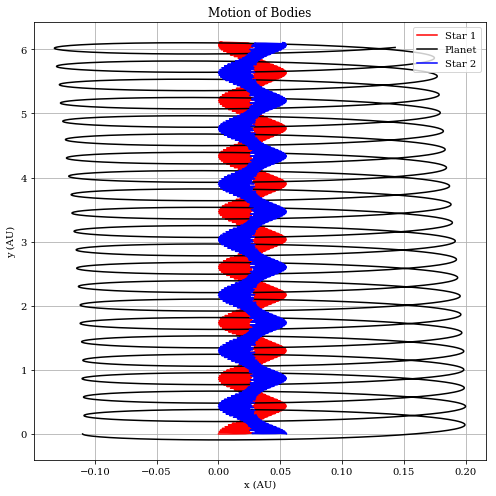

In [2]:
#print(const.G.value)
GConst = const.G.to('AU**3/Msun*yr**2').value
#print(GConst)
numP = 25 ## Number of periods to run each graphing

def threeBody(p=1, G=GConst, ϵ=0.001, n=3):
    ## Initial Conditions taken to be at apoapsis
    
    ## m1: first star; m2: planet; m3: second star; e: eccentricity; a: semi-major axis;
    
    m1 = 0.8
    m2 = 7.007369e-4
    m3 = 0.8
    e = 0.0 
    a = 0.110
    
     ## mc: central mass (first star and planet); M: total mass; μ: reduced mass
    
    mc = m1 + m2
    M = m1 + m2 + m3
    μ = (m1*m2)/mc
    μPrime = (mc*m3)/M
    
    P = 2.0 * np.pi * sqrt( (a**3) / (G * mc) )
    PPrime = 2.0 * np.pi * sqrt( (a**3) / (G * M) )
    
    ticity = sqrt( G * mc * a * ( 1 - e**2 ) )
    ticityPrime = sqrt( G * M * a * ( 1 - e**2 ) )
    
    r_a = a*(1+e)
    v_a = ticity/r_a
    v_aPrime = ticityPrime/r_a
    
    a1 = (r_a*μ)/m1
    a2 = (r_a*μ)/m2
    a3 = (r_a*μPrime)/m3
    vy1 = (v_a*μ)/m1
    vy2 = (v_a*μ)/m2
    vy3 = (v_aPrime*μPrime)/m3
    
    r1 = [a1,0,0]
    r2 = [-a2,0,0]
    r3 = [a3,0,0]
    v1 = [0,vy1,0]
    v2 = [0,-vy2,0]
    v3 = [0,vy3,0]
    
    m = np.array([m1,m2,m3])
    init_cond = np.array([r1,r2,r3,v1,v2,v3]).flatten()
    tarr = np.linspace(0.0, p*P, 4e3)
    res = odeint(gs, init_cond, tarr, args = (m,G,ϵ))
    
    plotter(res, 1,1,1, a3, proj=n, tarr=tarr)
    return

# threeBody(p=numP, n=0)
threeBody(p=numP, n=2)
# threeBody(p=numP, n=3)
# threeBody(p=numP, n=4)

## Varying the Universal Gravitational Constant

Despite traditionally being accepted as a constant value, various studies since 1962 have derived values of G that have disparities greater than their uncertainties. According to a [2015 paper](https://iopscience.iop.org/article/10.1209/0295-5075/110/10002) by Anderson et. al, it is possible that G varies with time periodcially, with an estimated amplitude of  $1.619 \pm 0.103 \times 10^{-14} \: \mathrm{ m^{3} kg^{-1} s^{-2} } $. This has potentially novel implications for the stability of this circumbinary orbit.

In [3]:
## Low-end estimate for the variance
low = (1.619e-14 - 0.103e-14) * ( u.m**3 * u.kg**(-1) * u.s**(-2) )
low = low.to('AU**3/Msun*yr**2').value
print('low: ',low)

## Mid-value estimate for the variance (exact is just a convenient variable)
exact = (1.619e-14) * ( u.m**3 * u.kg**(-1) * u.s**(-2) )
exact = exact.to('AU**3/Msun*yr**2').value
print('exact: ',exact)

## High-end estimate for the variance
high = (1.619e-14 + 0.103e-14) * ( u.m**3 * u.kg**(-1) * u.s**(-2) )
high = high.to('AU**3/Msun*yr**2').value
print('high: ',high)

## Range of possible minimum values of G
GminLow = GConst - low
GminEx = GConst - exact
print('GConst - GMinEx: ',GConst-GminEx)
GminHigh = GConst - high

## Range of possible maximum values of G
GmaxLow = GConst + low
GmaxEx = GConst + exact
print('GmaxEx - GConst',GmaxEx-GConst)
GmaxHigh = GConst + high

low:  0.008967081670565652
exact:  0.009576322707549993
high:  0.010185563744534333
GConst - GMinEx:  0.009576322707552265
GmaxEx - GConst 0.009576322707552265


### Minimum Value of G

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Minimum Value of G: Lower Bound


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


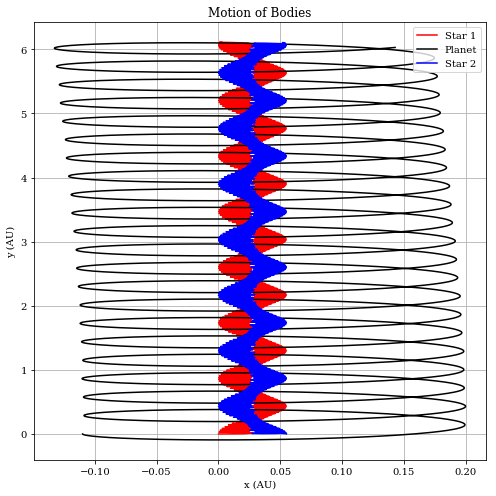



Minimum Value of G: Middle Estimate


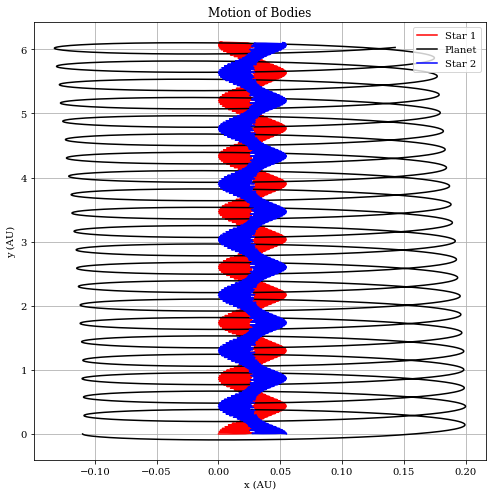



Minimum Value of G: Upper Bound


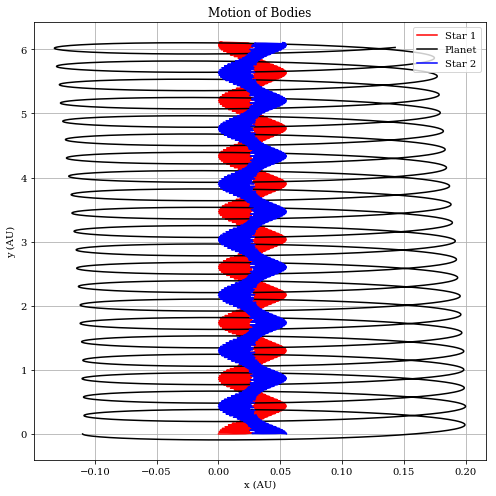

In [4]:
print("Minimum Value of G: Lower Bound")
threeBody(p=numP, G=GminLow, n=2)
# threeBody(p=numP, G=GminLow, n=3)
# threeBody(p=numP, G=GminLow, n=4)
print("\n")
print("Minimum Value of G: Middle Estimate")
threeBody(p=numP, G=GminEx, n=2)
# threeBody(p=numP, G=GminEx, n=3)
# threeBody(p=numP, G=GminEx, n=4)
print("\n")
print("Minimum Value of G: Upper Bound")
threeBody(p=numP, G=GminHigh, n=2)
# threeBody(p=numP, G=GminHigh, n=3)
# threeBody(p=numP, G=GminHigh, n=4)

### Maximum Value of G

Maximum Value of G: Lower Bound


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


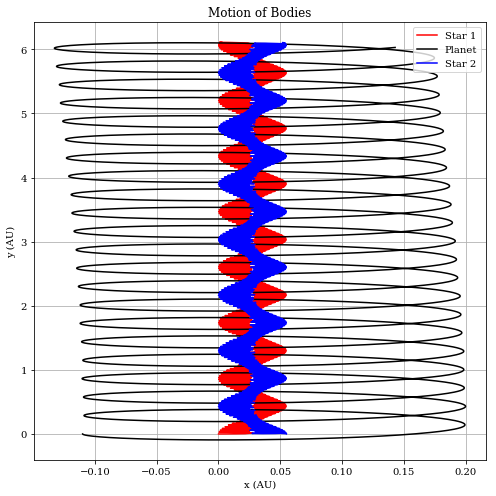



Maximum Value of G: Middle Estimate


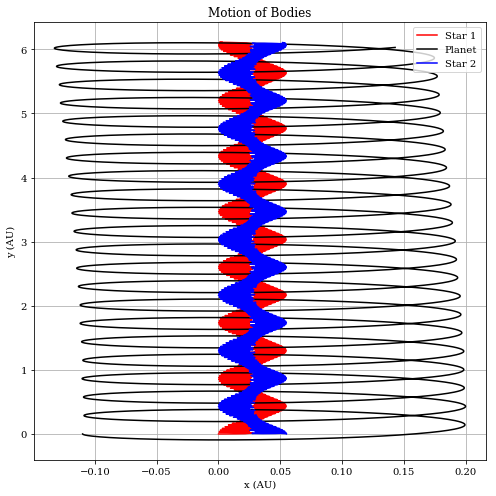



Maximum Value of G: Upper Bound


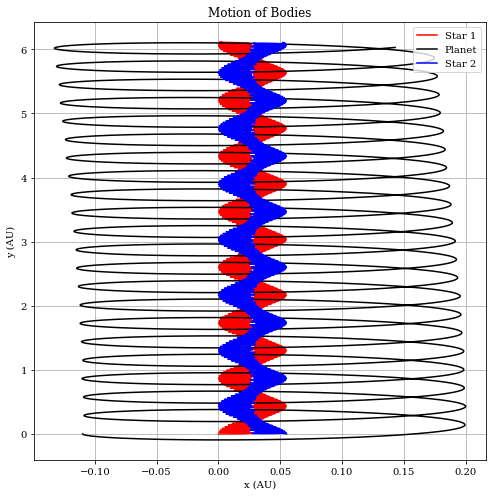

In [5]:
print("Maximum Value of G: Lower Bound")
threeBody(p=numP, G=GmaxLow, n=2)
# threeBody(p=numP, G=GmaxLow, n=3)
# threeBody(p=numP, G=GmaxLow, n=4)
print("\n")
print("Maximum Value of G: Middle Estimate")
threeBody(p=numP, G=GmaxEx, n=2)
# threeBody(p=numP, G=GmaxEx, n=3)
# threeBody(p=numP, G=GmaxEx, n=4)
print("\n")
print("Maximum Value of G: Upper Bound")
threeBody(p=numP, G=GmaxHigh, n=2)
# threeBody(p=numP, G=GmaxHigh, n=3)
# threeBody(p=numP, G=GmaxHigh, n=4)

### Varying the Universal Gravitational Constant: Conclusions

Looking at each of the evaluations, it seems that there isn't a particularly striking difference between these and the control system. This isn't wholly surprising, as the range of values for G is only around ~$0.02$. It's also worth noting that the validity of this study has been called into question, with a [2015 commentary](https://ui.adsabs.harvard.edu/abs/2015EL....11130002P/abstract) by M. Pitkin suggesting that there is most likely an additional noise term that explains the perceived periodicity.

## Varying the Smoothing Length

The smoothing length is perhaps a more salient constant to vary, as it is a constant chosen largely at our own discretion for this project and introduces a degree of bias to the simulation. I have outlined several different cases where I vary the value of the smoothing length from the original value of $\epsilon_{orig} = 0.001$

### Case 1: $\epsilon = 0$ ($\epsilon_{orig}\times 0$)

Setting $\epsilon = 0$ breaks the model, which makes sense; $\epsilon$ is used to prevent numierical divergences. I have supressed the error warnings here since they are quite long and were anticipated.

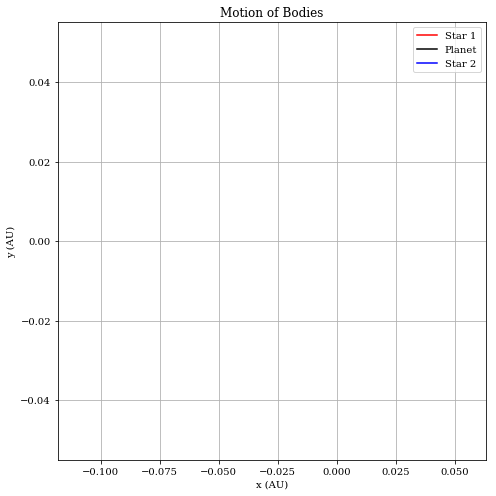

In [6]:
warnings.filterwarnings(action='ignore')
threeBody(p=numP, ϵ=0, n=2)
# threeBody(p=numP, ϵ=0, n=3)
# threeBody(p=numP, ϵ=0, n=4)

### Case 2: $\epsilon = 0.00001$ ($\frac{ \epsilon_{orig} }{100}$)

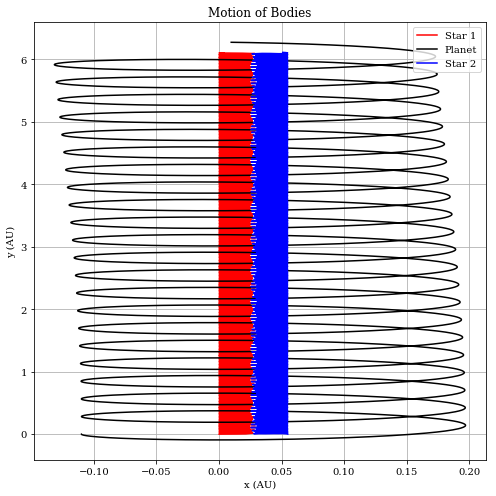

In [7]:
threeBody(p=numP, ϵ=0.00001, n=2)
# threeBody(p=numP, ϵ=0.00001, n=3)
# threeBody(p=numP, ϵ=0.00001, n=4)

### Case 3: $\epsilon = 0.0001$ ($\frac{ \epsilon_{orig} }{10}$)

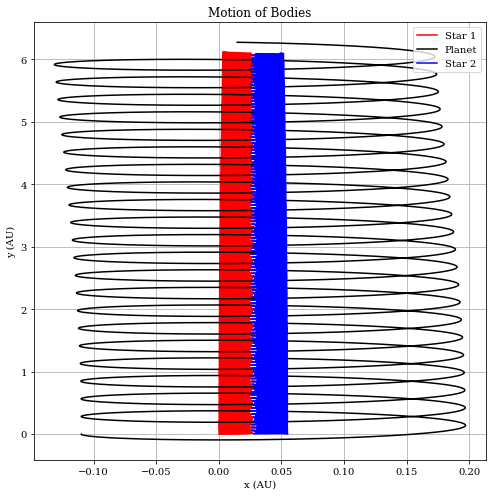

In [8]:
threeBody(p=numP, ϵ=0.0001, n=2)
# threeBody(p=numP, ϵ=0.0001, n=3)
# threeBody(p=numP, ϵ=0.0001, n=4)

### Case 4: $\epsilon = 0.01$ ($\epsilon_{orig}\times 10$)

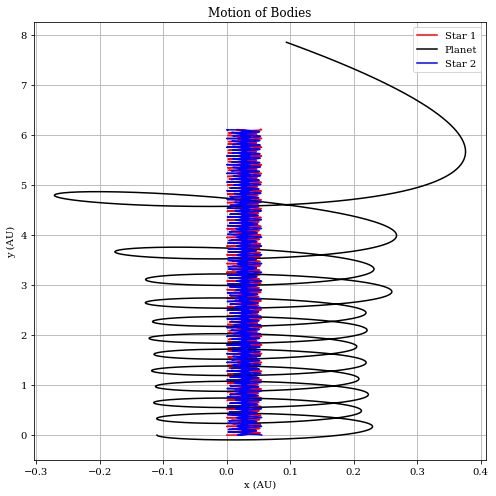

In [9]:
threeBody(p=numP, ϵ=0.01, n=2)
# threeBody(p=numP, ϵ=0.01, n=3)
# threeBody(p=numP, ϵ=0.01, n=4)

### Case 5: $\epsilon = 0.05$ ($\epsilon_{orig}\times 50$)

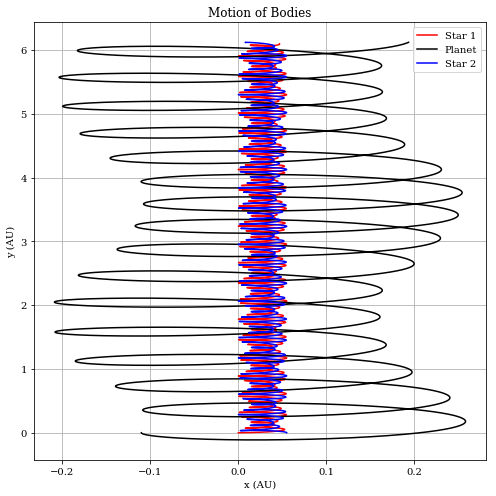

In [10]:
threeBody(p=numP, ϵ=0.05, n=2)
# threeBody(p=numP, ϵ=0.05, n=3)
# threeBody(p=numP, ϵ=0.05, n=4)

### Case 6: $\epsilon = 0.1$ ($\epsilon_{orig}\times 100$)

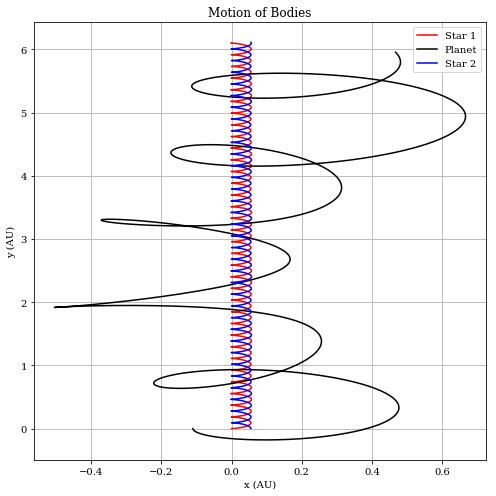

In [11]:
threeBody(p=numP, ϵ=0.1, n=2)
# threeBody(p=numP, ϵ=0.1, n=3)
# threeBody(p=numP, ϵ=0.1, n=4)

### Case 7: $\epsilon = 1.0$ ($\epsilon_{orig}\times 1000$)

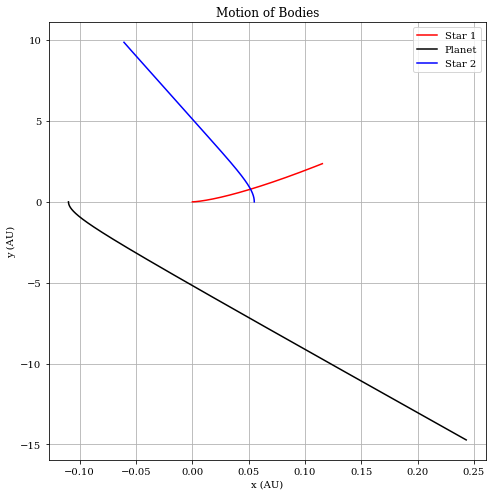

In [12]:
threeBody(p=numP, ϵ=1.0, n=2)
# threeBody(p=numP, ϵ=1.0, n=3)
# threeBody(p=numP, ϵ=1.0, n=4)

### Varying the Smoothing Length: Conclusions

There proved to be quite a significant difference in simulations with smoothing lengths equal to a multiple of the original value.  While each of the cases has a fairly unique outcome, I will attempt to draw some hollistic conclusions from the overall results

##### For smaller values of $\epsilon$:

As the smoothing length gets closer to zero, the system increasingly begins to behave similarly to a two-body system, as the stars begin to have a more standardized orbit with one another and behave similarly to a single star. Very low values are not entirely realistic, as in a physical system the stars would not be simple point masses and would have a certain minimum distance from one another to prevent collision.

##### For larger values of $\epsilon$:

As the smoothing length increases, the systems become more and more erratic, with a value somewhere between $\epsilon=0.05$ and  $\epsilon=0.1$ being the point that circumbinary orbit is no longer stable for this system, with $\epsilon=0.01$ being possibly unstable. While it is important to at least evaluate these extreme values, there is a point where the smoothing length is so large that it no longer accurately portrays a realistic system and the simulation stops being informative.

<br />

Overall, I wasn't able to determine a particularly consistent way of determining an appropriate smoothing constant value besides through trial-and-error. However, I suspect there are theorists much more experienced than myself who are able to determine less-biased heuristic methods using statistical analysis.